In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import special
import mpmath as mp
%matplotlib inline

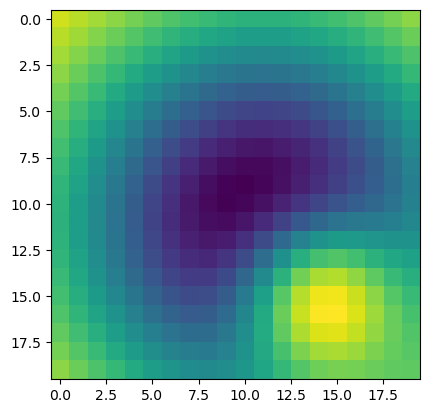

In [197]:
def l_OD_test(x, y):
    sigma = 0.3
    x_0 = 0.5
    y_0 = 0.4
    z = np.exp(-0.5*((x - x_0)**2 + (y - y_0)**2)/sigma**2)/(2*np.pi*sigma**2)
    
    sigma = .8
    x_0 = 0.1
    y_0 = 0.1
    z = z - 10*np.exp(-0.5*((x - x_0)**2 + (y - y_0)**2)/sigma**2)/(2*np.pi*sigma**2)
    return z

x_data = np.arange(-1, 1, 0.1)
y_data = np.arange(-1, 1, 0.1)
plt.imshow(l_OD_test(x_data[:, None], y_data[None, :]))
l_OD_data = l_OD_test(x_data[:, None], y_data[None, :])

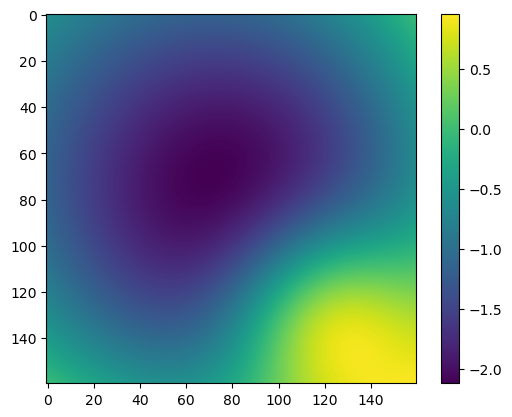

In [198]:
l_OD = scipy.interpolate.RectBivariateSpline(x_data, y_data, l_OD_data)
x = np.arange(-0.8, 0.8, 0.01)
y = np.arange(-0.8, 0.8, 0.01)

def tau(x, y, args):
    x_s, y_s, D = args
    return 0.5*((x - x_s)**2 + (y - y_s)**2)/D + l_OD.ev(x, y)
args = -0.5, -0.5, 1
plt.imshow(tau(x[:, None], y[None, :], args))
plt.colorbar()


In [187]:
def inv_M(x, y, args):
    h = 0.005
    M_xx = (tau(x + 2*h, y, args) + tau(x - 2*h, y, args) - 2*tau(x, y, args))/h**2
    M_yy = (tau(x, y + 2*h, args) + tau(x, y - 2*h, args) - 2*tau(x, y, args))/h**2
    M_xy = 0
    res = [[M_xx, M_xy], [M_xy, M_yy]]
    return res
inv_M(0,1, args)

[[3.9444800166599236, 0], [0, 4.000000000008441]]

In [199]:
def inv_M(x, y, args):
    h = 0.001
    res = 0
    M_xx = (tau(x + 2*h, y, args) + tau(x - 2*h, y, args) - 2*tau(x, y, args))/h**2
    M_yy = (tau(x, y + 2*h, args) + tau(x, y - 2*h, args) - 2*tau(x, y, args))/h**2
    M_xy = (0.25/h**2)*(tau(x + h, y + h, args) + tau(x - h, y - h, args) - tau(x + h, y - h, args) - tau(x - h, y + h, args))
    res = [[M_xx, M_xy], [M_xy, M_yy]]
    return res

A = np.zeros([2, 2, np.size(x), np.size(y)])
det_inv_M = np.zeros([np.size(x), np.size(y)])
for i in range(0, np.size(x)):
    for j in range(0, np.size(x)):
        A[:, :, i, j] = inv_M(x[i], y[j], args)
        det_inv_M[i, j] = np.linalg.det(A[:, :, i, j])

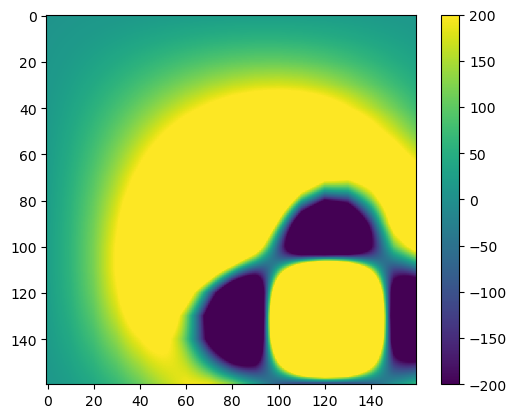

In [202]:
plt.imshow(det_inv_M, vmin = -200, vmax = 200)#np.max(det_inv_M))
plt.colorbar()